First 5 rows of the Iris Dataset:
   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa




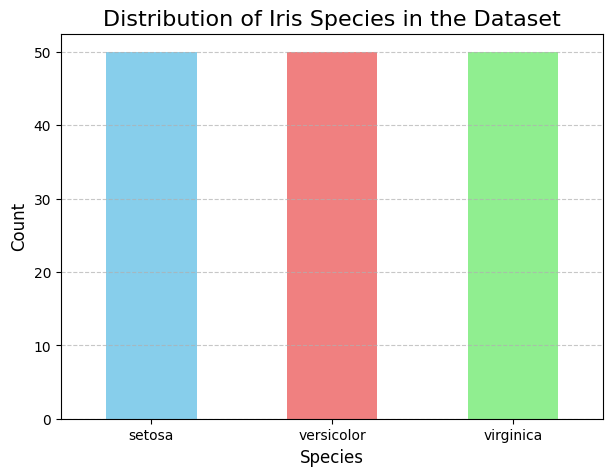

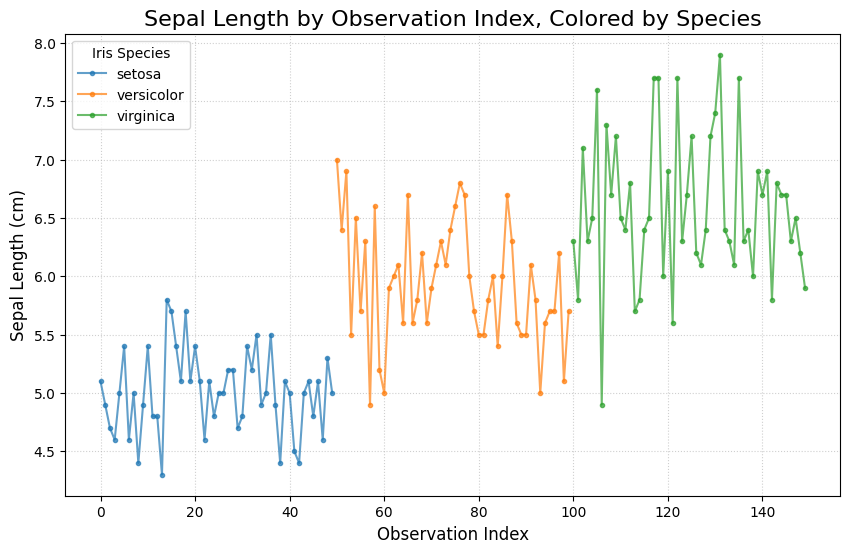

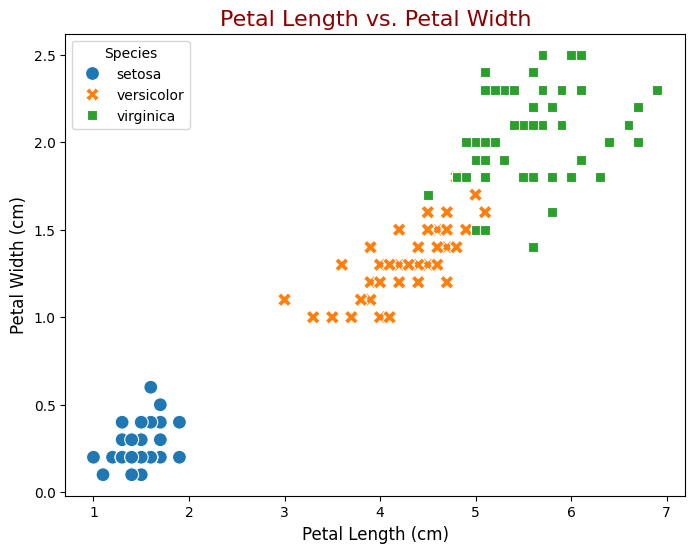

Plot successfully exported as: scatter_plot_iris.png


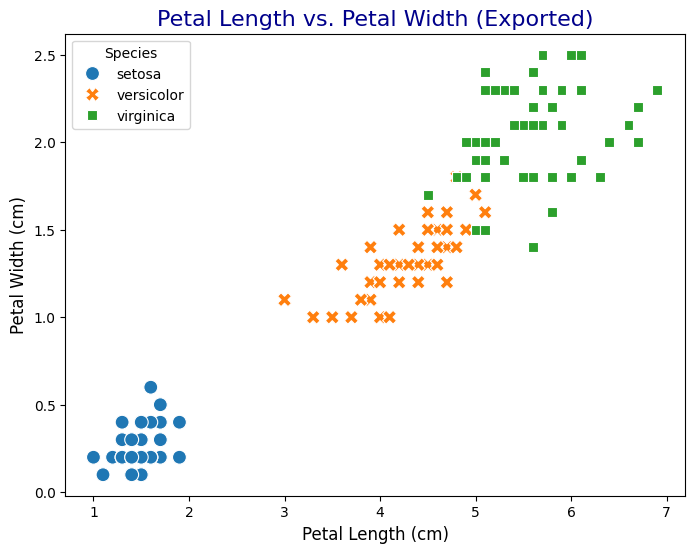

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np # Used for a simple 'index' for the line plot

# 1. Load the Dataset
# The Iris dataset is conveniently available in the seaborn library
iris_df = sns.load_dataset('iris')

print("First 5 rows of the Iris Dataset:")
print(iris_df.head())
print("\n")

# --- BAR PLOT: Distribution of Species ---
plt.figure(figsize=(7, 5))
# Calculate the count of each species for the bar plot
species_counts = iris_df['species'].value_counts()
species_counts.plot(kind='bar', color=['skyblue', 'lightcoral', 'lightgreen'])

# Customization
plt.title('Distribution of Iris Species in the Dataset', fontsize=16)
plt.xlabel('Species', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=0) # Keep labels horizontal
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()
# 

# --- LINE CHART: Sepal Length Over Observation Index ---
plt.figure(figsize=(10, 6))

# Treat the observation index as the 'time' for a line plot
# We can color-code the lines by species for a more interesting view
for species in iris_df['species'].unique():
    subset = iris_df[iris_df['species'] == species]
    # Use np.arange for the x-axis index to ensure correct plotting
    plt.plot(
        subset.index, 
        subset['sepal_length'], 
        label=species, 
        marker='.', # Add markers for clarity
        alpha=0.7
    )

# Customization
plt.title('Sepal Length by Observation Index, Colored by Species', fontsize=16)
plt.xlabel('Observation Index', fontsize=12)
plt.ylabel('Sepal Length (cm)', fontsize=12)
plt.legend(title='Iris Species')
plt.grid(axis='both', linestyle=':', alpha=0.6)
plt.show()
# 

# --- SCATTER PLOT: Relationship between Petal Length and Petal Width ---
plt.figure(figsize=(8, 6))

# Use seaborn for an easy-to-read scatter plot with automatic coloring by species
sns.scatterplot(
    data=iris_df, 
    x='petal_length', 
    y='petal_width', 
    hue='species', # Color the points based on the 'species' column
    style='species', # Use different markers for each species
    s=100 # Set marker size
)

# Customization
plt.title('Petal Length vs. Petal Width', fontsize=16, color='darkred')
plt.xlabel('Petal Length (cm)', fontsize=12)
plt.ylabel('Petal Width (cm)', fontsize=12)
plt.legend(title='Species', loc='upper left', frameon=True)
plt.show()
# 

# --- EXPORT PLOT AS IMAGE ---
# We will export the scatter plot we just created
# NOTE: The savefig command should be run right before plt.show() or instead of it.
# To demonstrate the export function, we'll re-create the figure object.
fig, ax = plt.subplots(figsize=(8, 6))

sns.scatterplot(
    data=iris_df, 
    x='petal_length', 
    y='petal_width', 
    hue='species', 
    style='species', 
    s=100,
    ax=ax
)

ax.set_title('Petal Length vs. Petal Width (Exported)', fontsize=16, color='darkblue')
ax.set_xlabel('Petal Length (cm)', fontsize=12)
ax.set_ylabel('Petal Width (cm)', fontsize=12)
ax.legend(title='Species')

# Export the plot as a high-resolution PNG file
filename = 'scatter_plot_iris.png'
fig.savefig(filename, dpi=300, bbox_inches='tight')

print(f"Plot successfully exported as: {filename}")